In [2]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
 # Training Parameters
learning_rate = 0.01
num_steps = 10000
batch_size = 120
display_step = 100

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability) 

In [0]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and square activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    return x

def meanpool2d(x, k=2):
    
    return tf.nn.avg_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1_ = conv2d(x, weights['wc1'], biases['bc1'])
    conv1_ = tf.square(conv1_)
    conv1 = meanpool2d(conv1_, k=2)
    
    conv2_ = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = meanpool2d(conv2_, k=2)
    
    fc1_ = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1_, weights['wd1']), biases['bd1'])
    fc1 = tf.square(fc1)
    # Apply Dropout
    fc1_2 = tf.nn.dropout(fc1, dropout)
    
    check = {}
    check['conv1'] = conv1_
    check['conv1mp'] = conv1
    check['conv2'] = conv2_
    check['conv2mp'] = conv2
    check['fc1_reshape'] = fc1_
    check['fc1_wb'] = fc1
    check['fc1_drp'] = fc1_2

    # Output, class prediction
    out = tf.add(tf.matmul(fc1_2, weights['out']), biases['out'])
    return out, check

In [0]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 5 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 5])),
    # 5x5 conv, 5 inputs, 10 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 5, 10])),
    # fully connected, 7*7*10 inputs, 128 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*10, 128])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([128, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([5])),
    'bc2': tf.Variable(tf.random_normal([10])),
    'bd1': tf.Variable(tf.random_normal([128])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Construct model
logits,verify = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))



sess = tf.Session()
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
# Run the initializer
sess.run(init)

In [6]:
# Start training
import numpy as np
for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

print("Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                  Y: mnist.test.labels[:256],
                                  keep_prob: 1.0}))

Step 1, Minibatch Loss= 159074992.0000, Training Accuracy= 0.125
Step 100, Minibatch Loss= 497969.1875, Training Accuracy= 0.867
Step 200, Minibatch Loss= 363224.0625, Training Accuracy= 0.900
Step 300, Minibatch Loss= 186837.8594, Training Accuracy= 0.892
Step 400, Minibatch Loss= 243256.2656, Training Accuracy= 0.850
Step 500, Minibatch Loss= 78208.9531, Training Accuracy= 0.925
Step 600, Minibatch Loss= 103313.7891, Training Accuracy= 0.900
Step 700, Minibatch Loss= 126782.6953, Training Accuracy= 0.908
Step 800, Minibatch Loss= 80003.4062, Training Accuracy= 0.908
Step 900, Minibatch Loss= 117584.2969, Training Accuracy= 0.883
Step 1000, Minibatch Loss= 23355.2051, Training Accuracy= 0.950
Step 1100, Minibatch Loss= 24589.8496, Training Accuracy= 0.942
Step 1200, Minibatch Loss= 30010.2070, Training Accuracy= 0.925
Step 1300, Minibatch Loss= 49054.7344, Training Accuracy= 0.900
Step 1400, Minibatch Loss= 20765.3496, Training Accuracy= 0.933
Step 1500, Minibatch Loss= 24749.9180, Tr

Step 5500, Minibatch Loss= 174.9588, Training Accuracy= 0.975
Step 5600, Minibatch Loss= 2402.7744, Training Accuracy= 0.950
Step 5700, Minibatch Loss= 1578.2898, Training Accuracy= 0.950
Step 5800, Minibatch Loss= 543.6522, Training Accuracy= 0.967
Step 5900, Minibatch Loss= 918.3958, Training Accuracy= 0.967
Step 6000, Minibatch Loss= 0.0000, Training Accuracy= 1.000
Step 6100, Minibatch Loss= 2267.0627, Training Accuracy= 0.958
Step 6200, Minibatch Loss= 497.6160, Training Accuracy= 0.967
Step 6300, Minibatch Loss= 120.2197, Training Accuracy= 0.983
Step 6400, Minibatch Loss= 808.6403, Training Accuracy= 0.983
Step 6500, Minibatch Loss= 2100.7190, Training Accuracy= 0.950
Step 6600, Minibatch Loss= 286.0892, Training Accuracy= 0.983
Step 6700, Minibatch Loss= 1522.1833, Training Accuracy= 0.967
Step 6800, Minibatch Loss= 686.8840, Training Accuracy= 0.967
Step 6900, Minibatch Loss= 583.4633, Training Accuracy= 0.967
Step 7000, Minibatch Loss= 760.6177, Training Accuracy= 0.967
Step 

In [18]:
print(sess.run(logits, feed_dict={X: np.expand_dims(mnist.test.images[1,:],0),keep_prob: 1.0}))
# print(mnist.test.labels[1,:])

[[-14433.6     27472.553   59175.754  -14321.43   -31761.506  -13806.6455
  -49276.55     1273.9042   6336.773    9501.764 ]]


Prediction: [6] Actual: 6


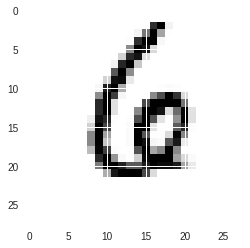

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
idx = 123 # change value to test different image
pred = sess.run(tf.argmax(prediction,1), feed_dict={X: np.expand_dims(mnist.test.images[idx,:],0),keep_prob: 1.0})
print ("Prediction:", pred, "Actual:",np.argmax(mnist.test.labels[idx,:],-1))#tf.argmax(np.expand_dims(mnist.test.labels[1],0))#

plt.imshow(np.reshape(mnist.test.images[idx,:],(28,28)))

In [0]:
from google.colab import files
np.save('testim2.npy',mnist.test.images[15,:])
files.download('testim2.npy')

In [0]:
from google.colab import files
np.save('weights1.npy',sess.run(weights['wc1']))
files.download('weights1.npy')

In [0]:
np.save('weights2.npy',sess.run(weights['wc2']))
files.download('weights2.npy')

In [0]:
np.save('weights3.npy',sess.run(weights['wd1']))
files.download('weights3.npy')

In [0]:
np.save('weights4.npy',sess.run(weights['out']))
files.download('weights4.npy')

In [0]:
np.save('bc1.npy',sess.run(biases['bc1']))
files.download('bc1.npy')

In [0]:
np.save('bc2.npy',sess.run(biases['bc2']))
files.download('bc2.npy')

In [0]:
np.save('bd1.npy',sess.run(biases['bd1']))
files.download('bd1.npy')

In [0]:
np.save('bout.npy',sess.run(biases['out']))
files.download('bout.npy')

In [52]:
print(sess.run(weights['wc1']))

[[[[-1.15479812e-01  4.16034967e-01 -4.00686592e-01  8.28465939e-01
     5.19545019e-01]]

  [[-2.59787321e-01  9.04210091e-01 -7.78959468e-02 -4.09770966e-01
     1.81714550e-01]]

  [[ 2.25485805e-02 -3.54892313e-02  3.57550025e-01  6.68362901e-02
     4.74855304e-01]]

  [[-5.02884239e-02  2.41878003e-01 -1.52268587e-02  1.19749762e-01
    -1.00468755e+00]]

  [[ 2.88923532e-01 -2.02378616e-01 -1.45098820e-01  3.28658134e-01
     5.59653223e-01]]]


 [[[ 4.27955955e-01 -1.21412039e+00  1.00577474e+00 -1.27317637e-01
    -5.35779953e-01]]

  [[ 1.28767863e-01 -2.32767940e-01 -2.59762928e-02 -2.44712755e-02
    -5.29364228e-01]]

  [[ 1.80617824e-01 -6.16505086e-01 -5.18001199e-01  3.86687696e-01
     1.09244987e-01]]

  [[-5.69390535e-01  1.60222992e-01  4.18368548e-01 -5.78603506e-01
     1.75292969e-01]]

  [[ 1.95542634e-01  3.13383192e-01 -9.94491391e-03  1.08717859e-01
    -3.71219009e-01]]]


 [[[-3.22702676e-01  1.57034242e+00 -1.69747323e-01 -4.93205748e-02
     4.94472653e-0

In [55]:
print(mnist.test.images[1,:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.454902   0.4901961
 0.67058825 1.         1.         0.5882353  0.36